# Loudness Multi-Axis test

In this notebook, we check the functions of the file caits.fe._loudness.

## Step 1: Import libraries

In [12]:
import pandas as pd
import numpy as np
from caits import visualization as vis
from caits.fe import (
    dBFS,
    max_possible_amplitude,
    ratio_to_db,
    max_value
)

## Step 2: Initialize dataset

In [13]:
# Parameters
n_samples = 1000
sample_rate = 1000  # Hz
duration = 1.0

# Time array
t = np.linspace(0, duration, n_samples, endpoint=False)

# Create 3 known-amplitude sine wave channels
ch1 = 1.0 * np.sin(2 * np.pi * 5 * t)    # Full scale
ch2 = 0.5 * np.sin(2 * np.pi * 5 * t)    # -6.02 dBFS
ch3 = 0.25 * np.sin(2 * np.pi * 5 * t)   # -12.04 dBFS

# Stack into shape (samples, channels)
data = np.stack((ch1, ch2, ch3), axis=-1)

data.shape


(1000, 3)

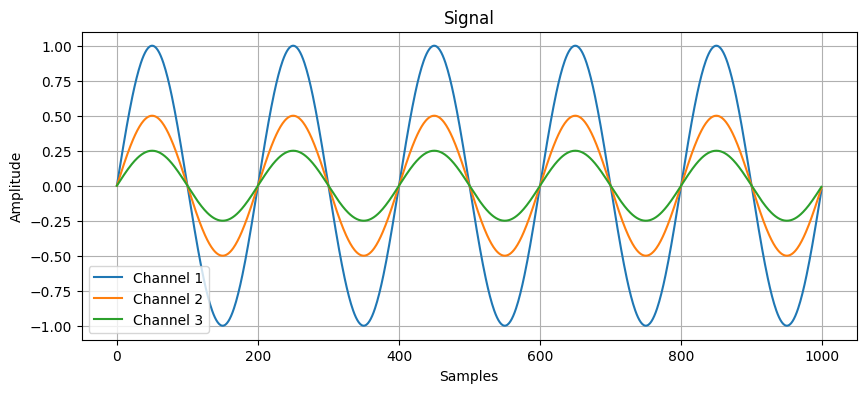

In [14]:
fig = vis.plot_signal(data, sr=sample_rate)

## Step 3: dBFS

In [15]:
dbfs_sig = dBFS(data, sample_width=2)
dbfs_sig.shape

(3,)

In [16]:
dbfs_sig

array([ -93.31929866,  -99.33989857, -105.36049848])

## Step 4: Ratio to dB

In [22]:
ratios = max_value(data)
ratio_sig = ratio_to_db(ratios)
ratio_sig

array([  0.        ,  -6.02059991, -12.04119983])

In [23]:
ratio_to_db(ratios, using_amplitude=False)

array([ 0.        , -3.01029996, -6.02059991])

In [24]:
ratio_to_db(ratios, using_amplitude=True, val2 = 0.5)

array([ 6.02059991,  0.        , -6.02059991])